unit11 대중교통 데이터 시각화하기

- T-money 자료 제공
- 문제1. 유임 승차 비율이 가장 높은 역은 어디일까?

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('subwayfee.csv', encoding='cp949')
df = df.dropna() # 누락값이 있는 행은 버림
df = df.replace(',','',regex=True)
df.head(1)

In [19]:
arr = np.array(df)  # 배열로 변환
arr.shape

(597, 9)

In [21]:
# 유임승차를 가장 많이 하는 역
유임승차 = (arr[:,4]).astype(np.int)
arr[np.argmax(유임승차),1:4:2], np.max(유임승차), np.argmax(유임승차)

(array(['2호선', '강남'], dtype=object), 2894341, 31)

In [25]:
# 유임 승차 비율이 가장 높은 곳은?
무임승차 = (arr[:,6]).astype(np.int)
유임승차비율 = 유임승차/(무임승차+1)
arr[np.argmax(유임승차비율),1:4:2], np.max(유임승차비율), np.argmax(유임승차비율)

(array(['분당선', '복정'], dtype=object), 24.0, 237)

In [37]:
# 유무임 승차하 인원이 가장 많은 역은?
유무임승하차인원 = (arr[:,4:8]).astype(np.int)
#유무임승하차인원
a = np.sum(유무임승하차인원, axis=1)
arr[np.argmax(a),1:4:2], np.max(a), np.argmax(a)

(array(['2호선', '강남'], dtype=object), 6234453, 31)

In [39]:
# 무임 승차하 인원이 가장 많은 역은?
무임승하차인원 = (arr[:,6:8]).astype(np.int)
#무임승하차인원
b = np.sum(무임승하차인원, axis=1)
arr[np.argmax(b),1:4:2], np.max(b), np.argmax(b)

(array(['1호선', '종로3가'], dtype=object), 791491, 3)

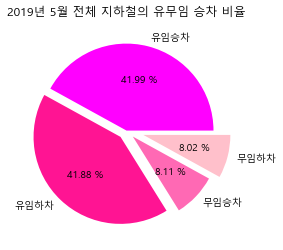

In [54]:
# 모든 역의 유무임 승하차 비율은 어떻게 될까?
# 파이(유임승차 00%, 무임하차 00%)
#[유임승차인원:4, 유임하차인원:5, 무임승차인원:6, 무임하차인원:7]
a = np.sum(arr[:,4:8].astype(np.int), axis=0)
color = ['magenta', 'deeppink', 'hotpink', 'pink']
plt.rc('font', family='Malgun Gothic')
n = plt.pie(a, labels=df.columns[4:8], colors=color, explode=(0,0.1,0.1,0.2),
            autopct='%.2f %%')
plt.title('2019년 5월 전체 지하철의 유무임 승차 비율')
plt.savefig('all_subway_ratio.png')

In [60]:
# 모든 역마다 유무임 승차 비율을 따로 파이 차트로 나타내기 
# 유임승차인원이 100만명 이상 승차하는 곳만

for i in range(len(arr)):
    row = arr[i]
    승하차인원 = row[4:8].astype(np.int)
    유임승차 = 승하차인원[0]
    if 유임승차 > 1000000 : 
        역이름 = row[1] + ' ' + row[3]
        파일명 = 'subway_' + 역이름 + '.png'
        color = ['magenta', 'deeppink', 'hotpink', 'pink']
        plt.rc('font', family='Malgun Gothic')
        n = plt.pie(a, labels=df.columns[4:8], colors=color, explode=(0,0.1,0.1,0.2),
                    autopct='%.2f %%')
        plt.title('2019년 5월 '+  역이름 + '역의 유무임 승차 비율')
        #plt.savefig(파일명)
        plt.close()